
activated with water 


conductimetric titration
optimized parameters [0.22267668 0.12521671]
standard error of parameters [0.00367618 0.00631681]

elemental analysis
optimized parameters [0.33467366 0.24179768]
standard error of parameters [0.00691191 0.02087223]

activated with DMF 


conductimetric titration
optimized parameters [0.1484471  0.12007064]
standard error of parameters [0.0306822  0.07420389]

elemental analysis
optimized parameters [0.30102683 0.12381924]
standard error of parameters [0.01147997 0.01434608]


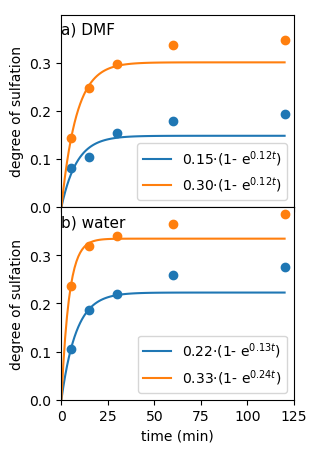

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
water_activated_ds_url = "https://github.com/yoshi-CERMAV/cellulose-2023/raw/main/water_activated_ds.pkl"
dmf_activated_ds_url =  "https://github.com/yoshi-CERMAV/cellulose-2023/raw/main/dmf_activated_ds.pkl"
df = pd.read_pickle(water_activated_ds_url)
#'water_activated_ds.pkl')
df1 = pd.read_pickle(dmf_activated_ds_url)

func = lambda x, a, b: a*(1-np.exp(-b*x))
import scipy.optimize
x0 = np.linspace(0,120,120)

fig = plt.figure(figsize=(3,5))
gs = fig.add_gridspec(2,1, hspace=0);
ax = gs.subplots(sharex=True, sharey=True)

def plot_ds(df, ax, title):
    x = df.index
    y = df["ds_titration"]
    popt, pcov = scipy.optimize.curve_fit(func, x[0:3],y[0:3])
    print ("\nconductimetric titration")
    print ("optimized parameters",popt)
    print ("standard error of parameters",np.sqrt(np.diag(pcov)))
    ax.plot(x0,func(x0, popt[0], popt[1]), label='%.2f'%popt[0]+'$\cdot$(1- e$^{{%.2f}t}$)'%popt[1])
    ax.scatter(x, y)
    y = df["ds_elemental"]
    popt, pcov = scipy.optimize.curve_fit(func, x[0:3],y[0:3])
    print ("\nelemental analysis")
    print ("optimized parameters",popt)
    print ("standard error of parameters", np.sqrt(np.diag(pcov)))
    ax.plot(x0,func(x0, popt[0], popt[1]), label='%.2f'%popt[0]+'$\cdot$(1- e$^{{%.2f}t}$)'%popt[1])
    ax.scatter(x, y)
    ax.set_xlim(0,125)
    ax.set_ylim(0,.4)
    ax.yaxis.get_major_ticks()[-1].set_visible(False)
    ax.legend(loc='best')
    ax.set_title(title, y=1.0, pad=-14, fontsize = 11, loc='left')
    ax.set_xlabel("time (min)")
    ax.set_ylabel("degree of sulfation")
print ("\nactivated with water \n")
plot_ds(df, ax[1], 'b) water')
print ("\nactivated with DMF \n")
plot_ds(df1, ax[0], 'a) DMF')


Text(0, 1, 'normailzed absorbance')

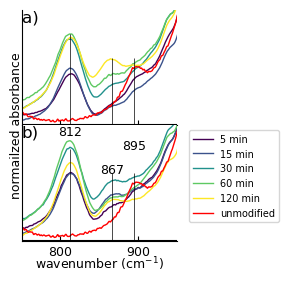

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
infrared_url = "https://github.com/yoshi-CERMAV/cellulose-2023/raw/main/infrared.pkl"
df = pd.read_pickle(infrared_url)
colors = plt.cm.viridis(np.linspace(0, 1, 5))
time = ["5 min", "15 min", "30 min", "60 min" ,"120 min"]

def my_normalize(df):
    df = df-df.min()
    df = df/df.max()
    return df

def plot1(ax, skip, x0, x1, y0, y1, left_onoff):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=left_onoff,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=left_onoff)
    ax.tick_params(axis="x", direction = "in")
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    ax.axhline(y=y0,color='k')
    for i in range (5):
        x = df.index
        y = df[df.columns[i+skip]]*x
        ax.plot(x,y, color=colors[i], linewidth=1, label=time[i])#, ax=axes1[0][0]
    y = df["untreated"]*x
    ax.plot(x,y, color="red", linewidth=1, label = "unmodified")
        
df = my_normalize(df)
fig = plt.figure(figsize=(2,3))
gs = fig.add_gridspec(2,1, hspace=0);
ax = gs.subplots(sharex=True, sharey=True)
plot1(ax[0], 0, 750, 950 ,160, 400, False)
plot1(ax[1], 5, 750, 950 ,160, 400, False)
#ax[0].yaxis.get_major_ticks()[0].set_visible(False)
#ax[1].yaxis.get_major_ticks()[0].set_visible(False)
ax[0].vlines(x=895, ymin=160, ymax=300, color = "black", linewidth=0.5)
ax[1].vlines(x=895, ymin=160, ymax=300, color = "black", linewidth=0.5)
ax[0].vlines(x=812, ymin=160, ymax=350, color = "black", linewidth=0.5)
ax[1].vlines(x=812, ymin=160, ymax=350, color = "black", linewidth=0.5)
ax[0].vlines(x=867, ymin=160, ymax=300, color = "black", linewidth=0.5)
ax[1].vlines(x=867, ymin=160, ymax=300, color = "black", linewidth=0.5)
ax[1].annotate('812', xy=(812, 400), xytext=(812, 380),ha='center', fontsize = 9)
ax[1].annotate('867', xy=(867, 300), xytext=(867, 300),ha='center', fontsize = 9)
ax[1].annotate('895', xy=(895, 350), xytext=(895, 350),ha='center', fontsize = 9)
ax[1].legend(bbox_to_anchor=(1.05, 1),loc='best', fontsize=7)
ax[0].set_title('a)', y = .9, pad = 0, loc='left')
ax[1].set_title('b)', y = .9, pad = 0, loc='left')
plt.xticks(fontsize=9)
plt.xlabel("wavenumber (cm$^{-1}$)", labelpad = -3, fontsize = 9)
plt.ylabel("normailzed absorbance", y=1, labelpad = -1, fontsize = 9)

Text(0.07, 0.5, 'normalized/ATR-corrected absorbance')

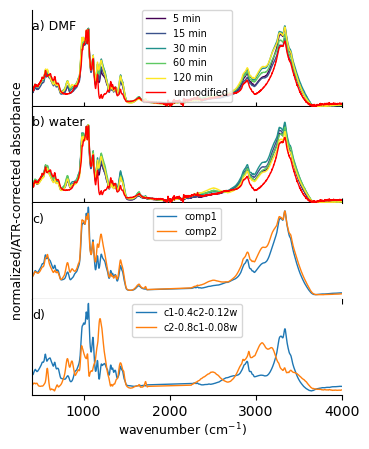

In [3]:
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

fig = plt.figure(figsize=(4,5))
gs = fig.add_gridspec(4,1, hspace=0);
ax = gs.subplots(sharex=True, sharey=False)
plot1(ax[0], 0, 400, 4000, 0, 1300, False)
plot1(ax[1], 5, 400, 4000, 0, 1300, False)

###doing principal component analysis & plotting
def savgol(x, wl=53, p=2, deriv=0): # application of Savitzky-Golay filter with 2nd order polynom & width of 53
    return savgol_filter(x, window_length=wl, polyorder=p, deriv=deriv)
df2= df.drop(df.index[range(3500,4500)])
df3 = df2.apply(savgol)
scaler = MinMaxScaler().fit(df3)
df4 =scaler.transform(df3)
model = NMF(n_components=2, init='random', random_state=0, tol=1e-5, max_iter=200000)
W = model.fit_transform(df4[:, 0: 10])#[:, 1: 11])
x = df2.index
y = W.T[0]*x
y = W.T[1]*x
df2["component1"] = W.T[0]
df2["component2"] = W.T[1]
df2["sub1"] = W.T[0]-0.4*W.T[1]-df2["water"]*.12#0.12
df2["sub2"] = (W.T[1]-0.8*W.T[0]-df2["water"]*.08)*1.5
def plot2(ax, y1, y2, labels):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)
    ax.autoscale()
    ax.set_xlim(400,4000)
#    ax.set_ylim(0,1600)
    y = y1*x
    ax.plot(x,y, linewidth=1, label = labels[0])
    y = y2*x
    ax.plot(x,y, linewidth=1, label = labels[1])

labels = ["comp1", "comp2"]
plot2(ax[2], df2["component1"], df2["component2"], labels);
labels = ["c1-0.4c2-0.12w", "c2-0.8c1-0.08w"]
plot2(ax[3], df2["sub1"], df2["sub2"], labels);
ax[0].legend(loc='best', fontsize=7)
ax[2].legend(loc='best', fontsize=7)
ax[3].legend(loc='best', fontsize=7)
name = ["a) DMF","b) water","c)","d)"]
for i in range (4):
    ax[i].set_title(name[i], y=1.0, pad=-14, fontsize = 9, loc='left')

fig.text(0.5, 0.03, 'wavenumber (cm$^{-1}$)', ha='center', fontsize=9)
fig.text(0.07, 0.5, 'normalized/ATR-corrected absorbance', va='center', rotation='vertical',fontsize=9)


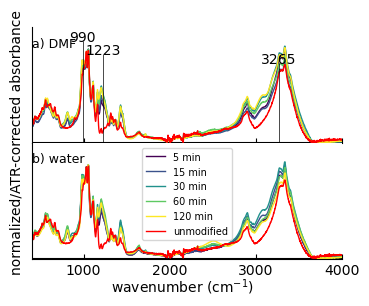

In [3]:
homogenized_ir_url = "https://github.com/yoshi-CERMAV/cellulose-2023/raw/main/infrared_homogenized.pkl"
df_h = pd.read_pickle(homogenized_ir_url)
df_h["untreated"]=df["untreated"]
df_h["water"]=df["water"]

colors = plt.cm.viridis(np.linspace(0, 1, 5))
df_h = my_normalize(df_h)
fig = plt.figure(figsize=(4,3))
gs = fig.add_gridspec(2,1, hspace=0);
ax = gs.subplots(sharex=True, sharey=False)
plot1(ax[0], 0, 400, 4000, 0, 1300, False)
plot1(ax[1], 5, 400, 4000, 0, 1300, False)
ax[0].yaxis.get_major_ticks()[0].set_visible(False)

def set_line(ax, x, y0, y1):
    ax.vlines(x=x, ymin = y0, ymax = y1, color="black", linewidth=.5)
    ax.annotate(str(x), xy=(x, y1), xytext=(x, y1),ha='center')

#set_line(ax[0], 1203, 0, 800)
set_line(ax[0], 1223, 0, 1000)
set_line(ax[0], 3265, 0, 900)
set_line(ax[0], 990, 0, 1150)

ax[1].legend(loc='best', fontsize=7)
name = ["a) DMF","b) water"]
for i in range (2):
    ax[i].set_title(name[i], y=1.0, pad=-14, fontsize = 9, loc='left')

fig.text(0.5, 0.0, 'wavenumber (cm$^{-1}$)', ha='center')
fig.text(0.07, 0.5, 'normalized/ATR-corrected absorbance', va='center', rotation='vertical')
fig.savefig("homogenized_IR.pdf", bbox_inches='tight', format="pdf")

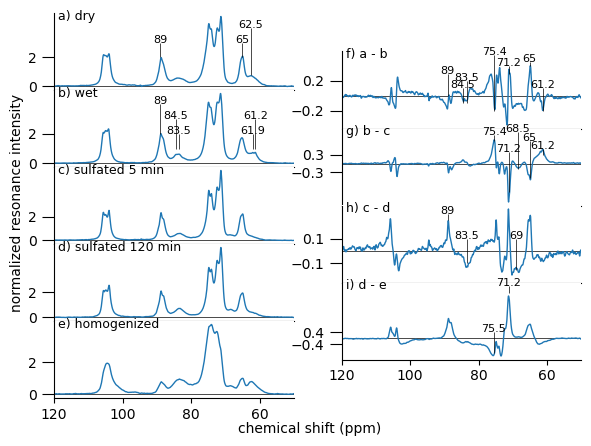

In [4]:
def set_line(ax, x, y0, y1):
    ax.vlines(x=x, ymin = y0, ymax = y1, color="black", linewidth=.5)
    ax.annotate(str(x), xy=(x, y1), xytext=(x, y1),ha='center', fontsize=8)
    
def plot1(ax, df, name, label, FT, tick):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_yticks(tick)
    ax.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=True,
            size=9)
    ax.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            top=False,      # ticks along the bottom edge are off
            bottom=FT,         # ticks along the top edge are off
            labelbottom=FT)
    ax.axhline(y = 0, color = 'black', linestyle = '-', linewidth=0.5)
    ax.set_xlim(120,50)
#    ax.set_ylim(0,10)
    x = df.index
    y = df[name]
    ax.plot(x,y,  linewidth=1, label=label)#, ax=axes1[0][0]
           
import matplotlib.gridspec as gridspec
pad = -5

df_raw = pd.read_pickle("NMR_data.pkl")
df_raw=df_raw/df_raw.sum()*1e3
df_raw["dry-wet"]= df_raw["cotton dry"]-df_raw["cotton wet"]
df_raw["wet-sulfated 5 min"]= df_raw["cotton wet"]-df_raw["sulfated 5 min"]
df_raw["sulfated 5 min - 120 min"]= df_raw["sulfated 5 min"]-df_raw["sulfated 120 min"]
df_raw["sulfated 120 min - homogenized"]= df_raw["sulfated 120 min"]-df_raw["homogenized"]
#df_raw["wet-sulfated 5 min"].plot()

fig = plt.figure(figsize=(6.8,5) )
gs = gridspec.GridSpec(10, 2, hspace=0)
ax = fig.add_subplot(gs[0:2, 0])
plot1(ax, df_raw, "cotton dry", "dry", False, [0, 2])
ax.set_title(" a) dry", y=1.0, pad=pad, fontsize = 9, loc='left')
set_line(ax, 65, 2, 3 )
set_line(ax, 62.5, .8, 4 )
set_line(ax, 89, 2, 3 )

ax = fig.add_subplot(gs[2:4, 0], sharex=ax)
plot1(ax, df_raw, "cotton wet", "wet", False, [0,2])
ax.set_title(" b) wet", y=1.0, pad=pad, fontsize = 9, loc='left')

set_line(ax, 84.5, 1, 3 )
set_line(ax, 83.5, 1, 2 )
set_line(ax, 61.2, 1, 3 )
set_line(ax, 61.9, 1, 2 )
set_line(ax, 89, 2, 4 )

ax = fig.add_subplot(gs[1:3, 1], sharex=ax)
plot1(ax, df_raw, "dry-wet", "dry-wet", False, [-.2, .2])
ax.set_title(" f) a - b", y=1.0, pad=pad, fontsize = 9, loc='left')

set_line(ax, 65, 0.4, 0.45 )
set_line(ax, 61.2, -0.2, 0.1 )
set_line(ax, 71.2, 0.3, 0.4 )
set_line(ax, 75.4, -0.2, 0.55 )

set_line(ax, 84.5, -0.1, 0.1 )
set_line(ax, 83.5, -0.1, 0.2 )
set_line(ax, 89, 0, .3 )

ax = fig.add_subplot(gs[4:6,0])
plot1(ax, df_raw, "sulfated 5 min", "sulfated 5 min", False, [0,2])
ax.set_title(" c) sulfated 5 min", y=1.0, pad=pad, fontsize = 9, loc='left')

ax = fig.add_subplot(gs[6:8,0])
plot1(ax, df_raw, "sulfated 120 min", "sulfated 120 min", False, [0,2])
ax.set_title(" d) sulfated 120 min", y=1.0, pad=pad, fontsize = 9, loc='left')

ax = fig.add_subplot(gs[8:10,0])
plot1(ax, df_raw, "homogenized", "homogenized", True, [0,2])
ax.set_title(" e) homogenized", y=1.0, pad=pad, fontsize = 9, loc='left')
ax = fig.add_subplot(gs[3:5, 1], sharex=ax)
plot1(ax, df_raw, "wet-sulfated 5 min", "wet-sulfated 5 min", False, [-.3,.3])
ax.set_title(" g) b - c", y=1.0, pad=pad, fontsize = 9, loc='left')

set_line(ax, 71.2, -1, 0.4 )
set_line(ax, 75.4, .8, 1 )
set_line(ax, 68.5, -0.2, 1.1 )

set_line(ax, 65, -0.5, 0.8 )
set_line(ax, 61.2, .3, 0.5 )

ax = fig.add_subplot(gs[5:7, 1], sharex=ax)
plot1(ax, df_raw, "sulfated 5 min - 120 min", "sulfated 5 min - 120 min", False, [-.1,.1])
ax.set_title(" h) c - d", y=1.0, pad=pad, fontsize = 9, loc='left')

set_line(ax, 89, 0.25, 0.3 )
set_line(ax, 83.5, -.1, .1 )
set_line(ax, 69, -.15, .1 )

ax = fig.add_subplot(gs[7:9, 1], sharex=ax)
plot1(ax, df_raw, "sulfated 120 min - homogenized", "sulfated 120 min - homogenized", True, [-.4,.4])
ax.set_title(" i) d - e", y=1.0, pad= pad, fontsize = 9, loc='left')
fig.text(0.5, 0.04, 'chemical shift (ppm)', ha='center')
fig.text(0.06, 0.5, 'normalized resonance intensity', va='center', rotation='vertical')
set_line(ax, 75.5, -1, .4 )
set_line(ax, 71.2, 3, 3.5 )
fig.savefig("nmr.pdf", bbox_inches='tight', format="pdf")